In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

train_df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [33]:
test_df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt
0,1,Puppy,2,307,0,1,1,0,0,2,...,2,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,"Puppy is calm for a young dog, but he becomes ...",378fcc4fc,3.0
1,2,London,24,266,0,1,2,7,0,2,...,1,1,1,0,41326,4475f31553f0170229455e3c5645644f,0,Urgently seeking adoption. Please contact for ...,73c10e136,1.0
2,2,Snowball,20,266,0,2,7,0,0,2,...,1,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,Snowball... doesn't look so good (she is healt...,72000c4c5,1.0
3,2,Malibu,5,266,252,2,1,6,7,2,...,1,1,1,100,41326,4475f31553f0170229455e3c5645644f,0,"Malibu: Female, Local Mix, 4-5 months, vaccina...",e147a4b9f,1.0
4,1,Lala Girl,6,307,0,2,1,2,7,2,...,1,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,LALA! That's my name. I'm a 6 month old girl d...,43fbba852,1.0


Test data does not contain target variable of speed of adoption

In [34]:
# Create helper method to visualise data
def visualise_count_plot(df, x_axis_column, title=None, split_by=None, show_percentage=False):
    # Plot title
    if title is not None:
        plt.title(title)
    
    # Size of rows in dataframe
    total = len(df)
    ax = sns.countplot(data=df, x=x_axis_column, hue=split_by)
    if show_percentage is True:   
        for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total),
                ha="center")
    plt.show()


def visualise_histogram_plot(df, x_axis_column, title=None, kde=False):
    if title is not None:
        plt.title(title)
    sns.distplot(df[x_axis_column], kde=kde)
    plt.show()


In [35]:
# Rename values for easier visualisation
train_df['Gender'] = train_df['Gender'].map({1: 'Male', 2: 'Female', 3: 'Mixed'})
train_df['Type'] = train_df['Type'].map({1: 'Dog', 2: 'Cat'})


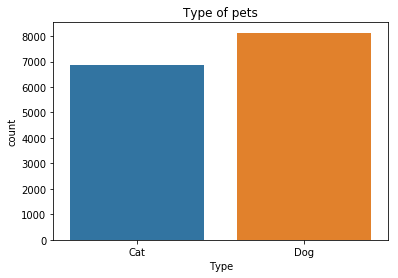

In [36]:
# Number of cats and dogs
visualise_count_plot(train_df, 'Type', 'Type of pets')

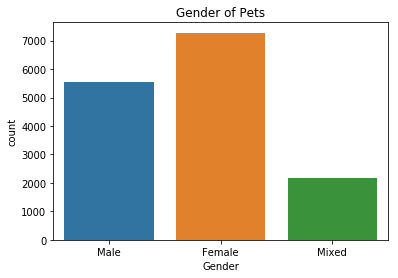

In [37]:
# Display Gender
visualise_count_plot(train_df, 'Gender', 'Gender of Pets')

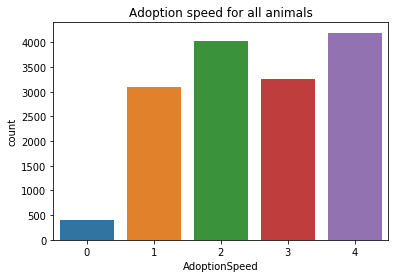

In [38]:
# Adoption rate for all animals
visualise_count_plot(train_df, 'AdoptionSpeed', title='Adoption speed for all animals')

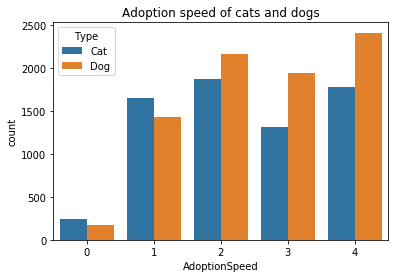

In [39]:
# Display adoption speed of cats dogs
visualise_count_plot(train_df, 'AdoptionSpeed', split_by='Type', title='Adoption speed of cats and dogs')

Cats are more likely to be adopted than dogs

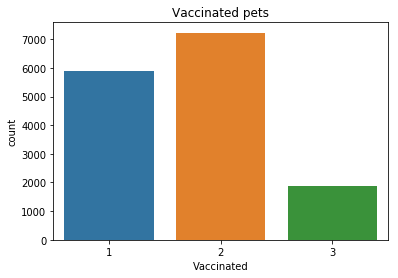

In [40]:
# Display vaccinated
visualise_count_plot(train_df, 'Vaccinated', 'Vaccinated pets')

/home/wongy/anaconda2/envs/ml_env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


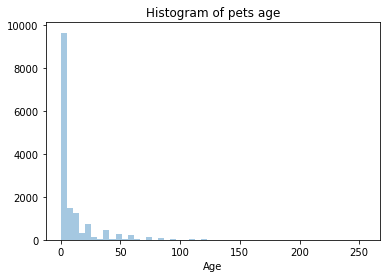

In [41]:
# Display distribution of age of pets
visualise_histogram_plot(train_df, 'Age', title='Histogram of pets age')

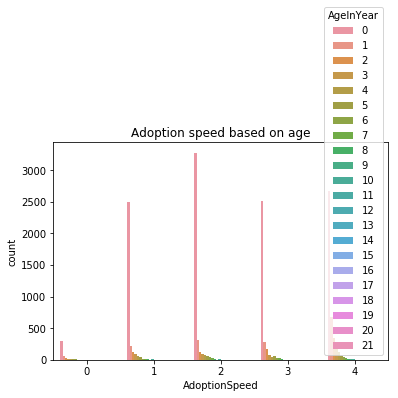

In [42]:
# Display adoption speed by age

# Bin months into years
years = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
train_df['AgeInYear'] = pd.cut(train_df['Age'], 22,
                                   labels=years)

visualise_count_plot(train_df, 'AdoptionSpeed', split_by='AgeInYear', title='Adoption speed based on age')

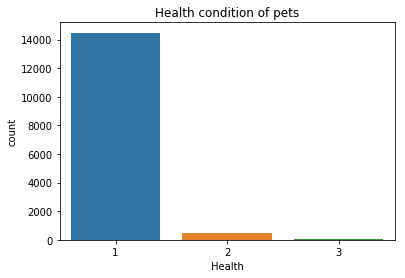

In [43]:
# Health condition of pets
#Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
visualise_count_plot(train_df, 'Health', title='Health condition of pets')

# Gender

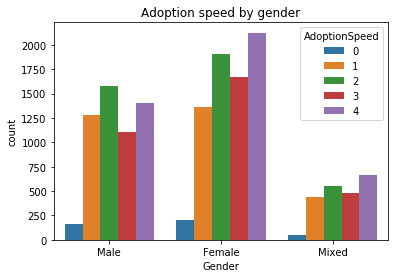

In [44]:
visualise_count_plot(train_df, 'Gender', split_by='AdoptionSpeed', title='Adoption speed by gender')

# Colors

In [45]:
color_lables_df = pd.read_csv('data/color_labels.csv')
keys = color_lables_df.ColorID
values = color_lables_df.ColorName

color_map = dict(zip(keys,values))
print(color_map)
train_df['Color1_map'] = train_df['Color1'].map(color_map)
print(train_df.Color1_map.unique())

{1: 'Black', 2: 'Brown', 3: 'Golden', 4: 'Yellow', 5: 'Cream', 6: 'Gray', 7: 'White'}
['Black' 'Brown' 'Cream' 'Gray' 'Golden' 'White' 'Yellow']


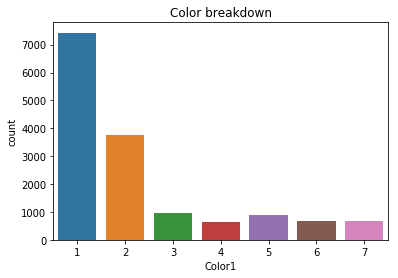

In [46]:
# Display colors
visualise_count_plot(train_df, 'Color1', title='Color breakdown')

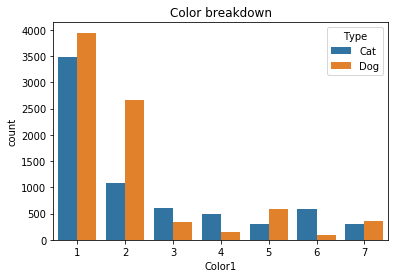

In [47]:
# Display colors by animal
visualise_count_plot(train_df, 'Color1', split_by='Type', title='Color breakdown')

Most of the pets are black and brown in color

# Maturity

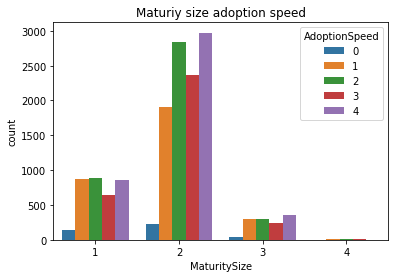

In [48]:
# Size and adoption speed
visualise_count_plot(train_df, 'MaturitySize', split_by='AdoptionSpeed', title='Maturiy size adoption speed')

# Vaccination

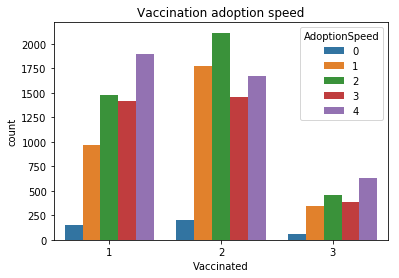

In [49]:
# Vaccination
visualise_count_plot(train_df, 'Vaccinated', split_by='AdoptionSpeed', title='Vaccination adoption speed')

# Sterilized and Vaccinated
Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)

Pets that have been neutured are more likely to be adopted

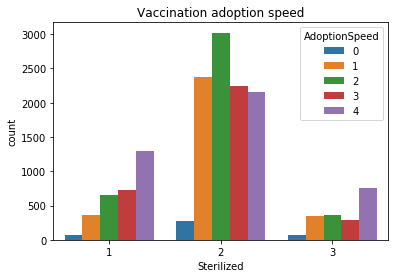

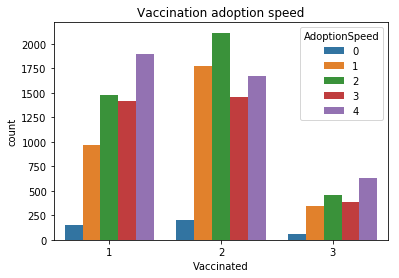

In [50]:
# Sterilized
visualise_count_plot(train_df, 'Sterilized', split_by='AdoptionSpeed', title='Vaccination adoption speed')
visualise_count_plot(train_df, 'Vaccinated', split_by='AdoptionSpeed', title='Vaccination adoption speed')

In [51]:
# Health and dewormed

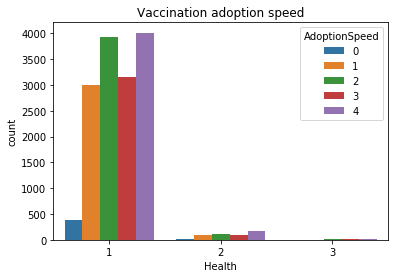

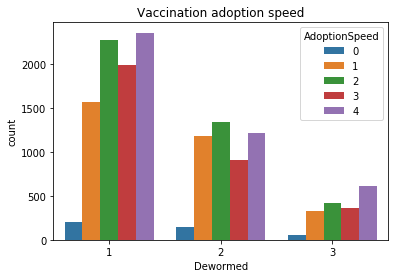

In [52]:
visualise_count_plot(train_df, 'Health', split_by='AdoptionSpeed', title='Vaccination adoption speed')
visualise_count_plot(train_df, 'Dewormed', split_by='AdoptionSpeed', title='Vaccination adoption speed')

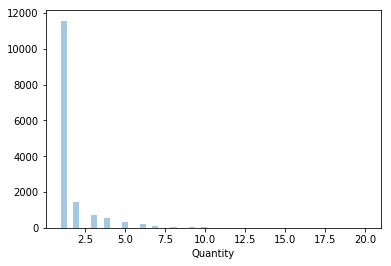

Pets Ranges from 1 to 20


In [53]:
visualise_histogram_plot(train_df, 'Quantity')
print('Pets Ranges from %s to %s' % (train_df['Quantity'].min(), train_df['Quantity'].max()))

Could possibly create a feature in term of individual and groups

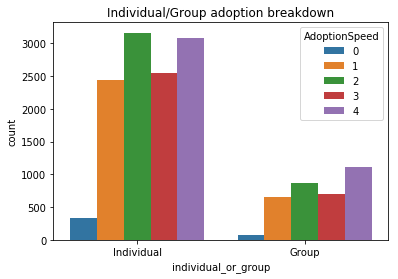

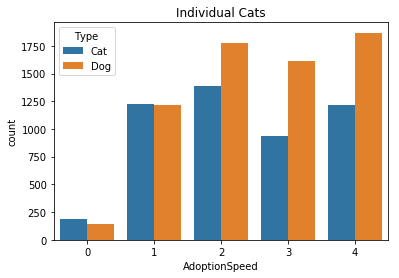

In [54]:
train_df['individual_or_group'] = train_df['Quantity'].apply(lambda x: 'Individual' if x == 1 else 'Group')
individual_cats = train_df[train_df['individual_or_group'] == 'Individual']
visualise_count_plot(train_df, 'individual_or_group', split_by='AdoptionSpeed',title='Individual/Group adoption breakdown')
visualise_count_plot(individual_cats, 'AdoptionSpeed', split_by='Type',title='Individual Cats')

Individual cats have a higher chance of getting adopted earlier

# Photo amount

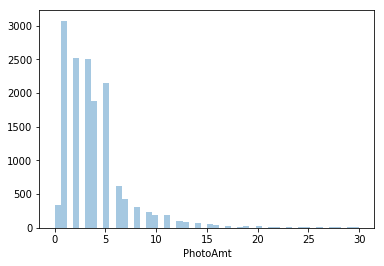

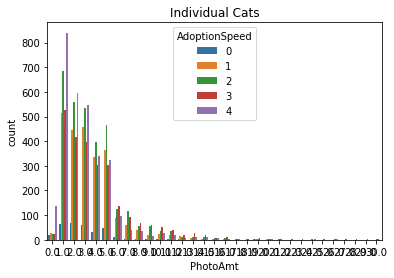

1.0    3075
2.0    2518
3.0    2511
5.0    2147
4.0    1881
Name: PhotoAmt, dtype: int64

In [55]:

visualise_histogram_plot(train_df, 'PhotoAmt')
visualise_count_plot(individual_cats, 'PhotoAmt', split_by='AdoptionSpeed',title='Individual Cats')
train_df['PhotoAmt'].value_counts().head()

# Model

In [56]:
# Select features to use
features = ['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'Vaccinated', 'Dewormed', 'AdoptionSpeed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'RescuerID', 'AdoptionSpeed']

train_df = train_df[[feature for feature in features if feature in train_df.columns]]
x_df = train_df[['Type', 'Age', 'Fee', 'MaturitySize']]
baba = train_df[['AdoptionSpeed']]
print(baba.head())
# test_df = test_df[[feature for feature in features if feature in test_df.columns]]

   AdoptionSpeed  AdoptionSpeed
0              2              2
1              0              0
2              3              3
3              2              2
4              2              2


In [60]:
features = ['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
            'Color3', 'MaturitySize', 'Vaccinated', 'Dewormed', 'AdoptionSpeed',
            'Sterilized', 'Health', 'Quantity', 'Fee']
# Rename values for easier visualisation
train_df['Gender'] = train_df['Gender'].map({'Male': 1, 'Female': 2,'Mixed': 3})
train_df['Type'] = train_df['Type'].map({'Dog': 1, 'Cat': 2})
train_df = train_df[[feature for feature in features if feature in train_df.columns]]
x_train = train_df.drop('AdoptionSpeed', axis=1)
y_df = train_df['AdoptionSpeed']
print(y_df.head())
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_df)
print('Accuracy on training {}'.format(tree.score(x_train, y_df)))
print('Predict {}'.format(tree.predict(x_train)))
result_df = test_df[[feature for feature in features if feature in test_df.columns]]
test_df['Predicted'] = tree.predict(result_df)
submission = test_df[['RescuerID', 'Predicted']]
submission.to_csv('submission.csv', index=False)

   AdoptionSpeed  AdoptionSpeed
0              2              2
1              0              0
2              3              3
3              2              2
4              2              2


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').